<a href="https://colab.research.google.com/github/BESTHAVENKATACHARAN/EEG-BASED-EMOTION-RECOGNITION/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 221s 8s/step - accuracy: 0.5556 - loss: 4.5480 - val_accuracy: 0.5714 - val_loss: 2.4468 - learning_rate: 0.0010
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 215s 8s/step - accuracy: 0.8232 - loss: 1.9280 - val_accuracy: 0.5340 - val_loss: 2.3397 - learning_rate: 0.0010
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 265s 8s/step - accuracy: 0.8621 - loss: 1.6464 - val_accuracy: 0.6370 - val_loss: 2.1746 - learning_rate: 0.0010
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 260s 8s/step - accuracy: 0.9160 - loss: 1.4389 - val_accuracy: 0.6698 - val_loss: 2.0142 - learning_rate: 0.0010
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 215s 8s/step - accuracy: 0.9117 - loss: 1.3530 - val_accuracy: 0.4941 - val_loss: 1.9316 - learning_rate: 0.0010
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 263s 8s/step - accuracy: 0.9163 - loss: 1.2740 - val_accuracy: 0.7986 - val_loss: 1.7147 - learning_rate: 0.0010
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 262s 8s/step - accuracy: 0.9332 - loss: 1.1804 - val_acc

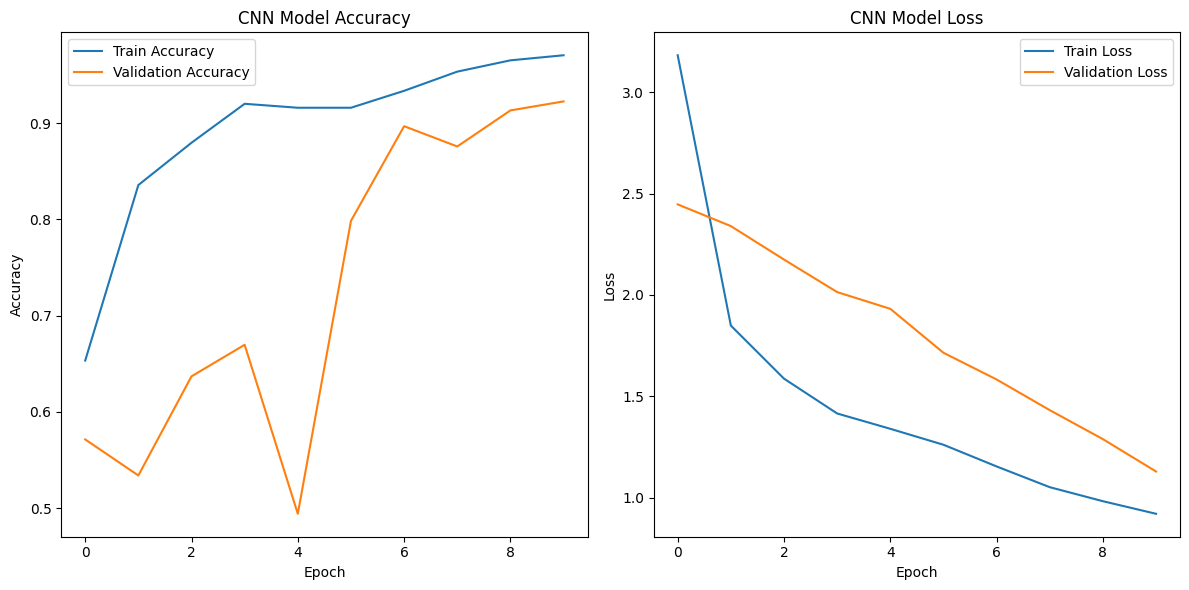

14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 895ms/step
Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.84      0.99      0.91       143
     NEUTRAL       0.99      0.98      0.99       148
    POSITIVE       0.96      0.79      0.87       136

    accuracy                           0.92       427
   macro avg       0.93      0.92      0.92       427
weighted avg       0.93      0.92      0.92       427



In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
data = pd.read_csv('emotions.csv')

# Separate features and labels
X = data.iloc[:, :-1].values  # All columns except the last
labels = data['label']        # The last column

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)
label_dict = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build enhanced CNN model
from tensorflow.keras.regularizers import l2

model_cnn = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Reshape((X_train.shape[1], 1)),

    # First Conv1D layer
    tf.keras.layers.Conv1D(filters=256, kernel_size=3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(pool_size=2),

    # Second Conv1D layer
    tf.keras.layers.Conv1D(filters=256, kernel_size=5, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(pool_size=2),

    # Third Conv1D layer
    tf.keras.layers.Conv1D(filters=256, kernel_size=7, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.GlobalMaxPooling1D(),

    # Fully connected layers
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(label_dict), activation='softmax')
])

model_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Add callbacks for training
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=2)
]

# Train the CNN model
history_cnn = model_cnn.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=callbacks
)

# Plot CNN training history
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('enhanced_cnn_training_history.png')
plt.show()

# Evaluate CNN model with classification report
y_pred = np.argmax(model_cnn.predict(X_test), axis=1)
unique_labels = np.unique(np.concatenate((y_pred, y_test)))
target_names = [label_encoder.classes_[i] for i in unique_labels]
report = classification_report(y_test, y_pred, target_names=target_names, labels=unique_labels)

print("Classification Report:\n", report)


# Parse classification report to extract precision values for each class
from sklearn.metrics import precision_score

#




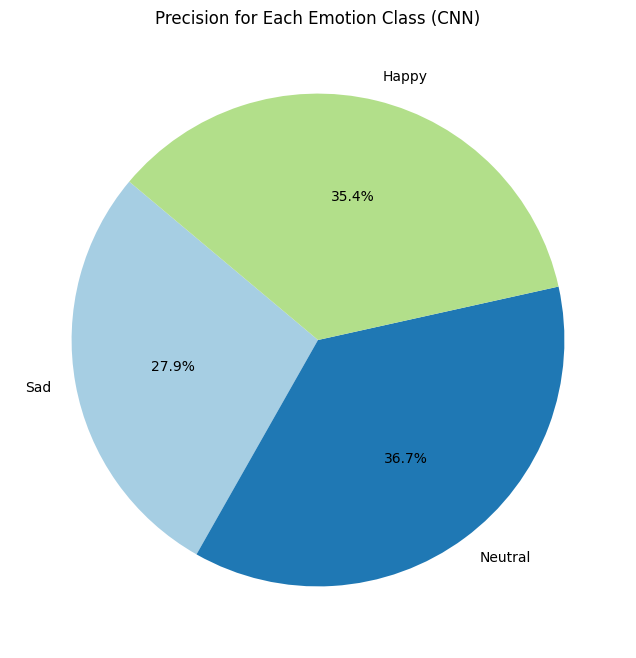

In [ ]:
import matplotlib.pyplot as plt

# Updated class labels mapping
updated_labels = {
    "POSITIVE": "Happy",
    "NEGATIVE": "Sad",
    "NEUTRAL": "Neutral"
}

# Map the original class names (e.g., 'positive', 'negative', 'neutral') in target_names to updated labels
mapped_labels = [updated_labels.get(label, label) for label in target_names]

# Ensure precision_scores is in the correct order that corresponds to mapped_labels
# Assuming precision_scores is a list or array with the precision values for each class
# You should check if precision_scores corresponds correctly to the updated labels

# Plot classification report as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    precision_scores,
    labels=mapped_labels,  # Use the updated mapped_labels
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired(range(len(mapped_labels)))  # Adjust colors dynamically
)
plt.title('Precision for Each Emotion Class (CNN)')
plt.savefig('cnn_classification_report_pie_chart_updated.png')
plt.show()

